In [1]:
def MultiColumnLabelEncoder(columns,df):
    X = df.iloc[:].values
    for i in range(len(columns)):
        X[:, columns[i]] = labelencoder.fit_transform(X[:, columns[i]])
    df = pd.DataFrame(X, columns=df.columns, index = df.index)
    return df

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('weatherAUS.csv', sep=',')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
#Z-нормализация по MinTemp
MO = df['MaxTemp'].mean()
SKO = df['MaxTemp'].std()
df['MaxTemp'] = (df['MaxTemp']-MO)/SKO
df

In [ ]:
#Z-нормализация по MinTemp
MO = df['MinTemp'].mean()
SKO = df['MinTemp'].std()
df['MinTemp'] = (df['MinTemp']-MO)/SKO
df

In [23]:
train_col = {'MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustDir'}
df_train = df[train_col]
df_train['Location'] = df['Location']
df_train

,WindGustDir,MinTemp,MaxTemp,Sunshine,Rainfall,Location
0,W,0.188476,-0.045139,NaN,0.6,Albury
1,WNW,-0.749244,0.263891,NaN,0.0,Albury
2,WSW,0.110333,0.348172,NaN,0.0,Albury
3,NE,-0.467928,0.671249,NaN,0.0,Albury
4,W,0.829252,1.275262,NaN,1.0,Albury
...,...,...,...,...,...,...
145455,E,-1.468163,0.025095,NaN,0.0,Uluru
145456,NNW,-1.343134,0.291984,NaN,0.0,Uluru
145457,N,-1.061818,0.516734,NaN,0.0,Uluru
145458,SE,-0.686729,0.530780,NaN,0.0,Uluru


In [24]:
columns = [0]
df_train = MultiColumnLabelEncoder(columns,df_train)
df_train = df_train.dropna()
df_train

,WindGustDir,MinTemp,MaxTemp,Sunshine,Rainfall,Location
6049,11,0.891767,1.68262,12.3,0.0,Cobar
6050,8,0.96991,0.79767,13.0,0.0,Cobar
6051,9,0.516679,1.528105,13.3,0.0,Cobar
6052,5,1.126197,2.019743,10.6,0.0,Cobar
6053,14,1.516914,2.132118,12.2,0.0,Cobar
...,...,...,...,...,...,...
142298,1,1.110568,1.429777,11.0,0.0,Darwin
142299,0,1.407513,1.317402,8.6,0.0,Darwin
142300,0,1.32937,1.345496,11.0,0.0,Darwin
142301,2,1.141826,1.205028,10.6,0.0,Darwin


In [25]:
from sklearn.metrics import silhouette_score

In [41]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
KMmodel = KMeans()
parametrs = {'n_clusters': range (3,6)}
grid = GridSearchCV(KMmodel, parametrs, scoring=silhouette_score)
grid.fit(df_train[train_col])
df_train['cluster'] = grid.best_estimator_.labels_


In [27]:
print(grid.best_params_)
df_train

{'n_clusters': 3}


,WindGustDir,MinTemp,MaxTemp,Sunshine,Rainfall,Location,cluster
6049,11,0.891767,1.68262,12.3,0.0,Cobar,0
6050,8,0.96991,0.79767,13.0,0.0,Cobar,2
6051,9,0.516679,1.528105,13.3,0.0,Cobar,0
6052,5,1.126197,2.019743,10.6,0.0,Cobar,2
6053,14,1.516914,2.132118,12.2,0.0,Cobar,0
...,...,...,...,...,...,...,...
142298,1,1.110568,1.429777,11.0,0.0,Darwin,2
142299,0,1.407513,1.317402,8.6,0.0,Darwin,2
142300,0,1.32937,1.345496,11.0,0.0,Darwin,2
142301,2,1.141826,1.205028,10.6,0.0,Darwin,2


In [28]:
clusters = pd.unique(df_train['cluster'])
for cluster in clusters:
    df_cluster = df_train[(df_train['cluster'] == cluster)]
    print(f"Cluster {cluster} ({df_cluster.shape})")
    print(df_cluster[train_col].describe())
    value_counts = df_cluster['Location'].value_counts()
    sorted_value_counts = value_counts.sort_values(ascending=False)
    print(sorted_value_counts.head(10))

Cluster 0 ((39864, 7))
        WindGustDir       MinTemp       MaxTemp  Sunshine  Rainfall
count         39864  39864.000000  39864.000000   39864.0   39864.0
unique           13    352.000000    379.000000     144.0     189.0
top              12     -0.405413     -0.508684       0.0       0.0
freq           5262    311.000000    285.000000    1146.0   22629.0
Albany              2460
Sydney              2259
Perth               2061
Nuriootpa           1966
Watsonia            1739
Mildura             1737
Portland            1657
MelbourneAirport    1640
MountGambier        1623
SydneyAirport       1606
Name: Location, dtype: int64
Cluster 2 ((33126, 7))
        WindGustDir       MinTemp       MaxTemp  Sunshine  Rainfall
count         33126  33126.000000  33126.000000   33126.0   33126.0
unique            9    361.000000    389.000000     144.0     150.0
top               0     -0.045954      1.022419       0.0       0.0
freq           5383    180.000000    199.000000     888.0   249

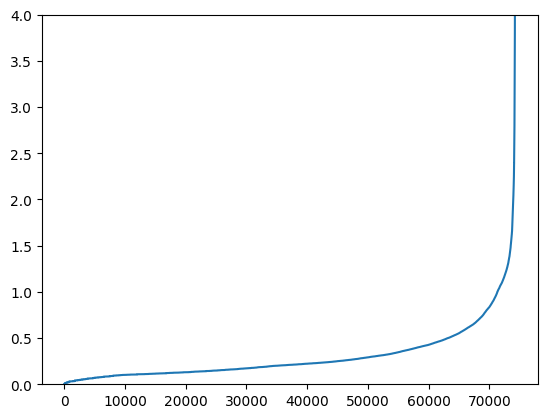

In [29]:
from sklearn.neighbors import NearestNeighbors
min_samples = 4 * len(train_col)
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(df_train[train_col])
distances, indices = neighbors_fit.kneighbors(df_train[train_col])
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
ax = plt.gca()
ax.set_ylim([0, 4])
plt.show()

In [42]:
from sklearn.cluster import DBSCAN
DBmodel = DBSCAN(eps=1.25)
parametrs = {'min_samples': [i * len(train_col) for i in range(6, 8)]}
grid = GridSearchCV(DBmodel, parametrs, scoring=silhouette_score)
grid.fit(df_train[train_col])
df_train['cluster_1'] = grid.best_estimator_.labels_
print(grid.best_params_)

{'min_samples': 30}


In [31]:
clusters = pd.unique(df_train['cluster_1'])
for cluster in clusters:
    df_cluster_1 = df_train[(df_train['cluster_1'] == cluster)]
    print(f"Cluster {cluster} ({df_cluster_1.shape})")
    print(df_cluster_1[train_col].describe())
    value_counts = df_cluster_1['Location'].value_counts()
    sorted_value_counts = value_counts.sort_values(ascending=False)
    print(sorted_value_counts.head(10))

Cluster 0 ((68378, 8))
        WindGustDir       MinTemp       MaxTemp  Sunshine  Rainfall
count         68378  68378.000000  68378.000000   68378.0   68378.0
unique           17    370.000000    396.000000     145.0     118.0
top               0      0.125962     -0.522731       0.0       0.0
freq           5024    448.000000    423.000000    1604.0   47616.0
Hobart              3014
Perth               2980
Sydney              2941
MelbourneAirport    2870
PerthAirport        2828
Watsonia            2822
Mildura             2782
Brisbane            2765
Nuriootpa           2717
SydneyAirport       2663
Name: Location, dtype: int64
Cluster -1 ((5728, 8))
        WindGustDir      MinTemp      MaxTemp  Sunshine  Rainfall
count          5728  5728.000000  5728.000000    5728.0    5728.0
unique           17   266.000000   303.000000     142.0     521.0
top               8     1.751344    -0.592965       0.0      13.2
freq            467    56.000000    45.000000     673.0      63.0
Darwi

In [33]:
from sklearn.cluster import AgglomerativeClustering
df_cut = df_train.head(25000)
agmodel = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agmodel.fit(df_cut[train_col])

AgglomerativeClustering(distance_threshold=0, n_clusters=None)

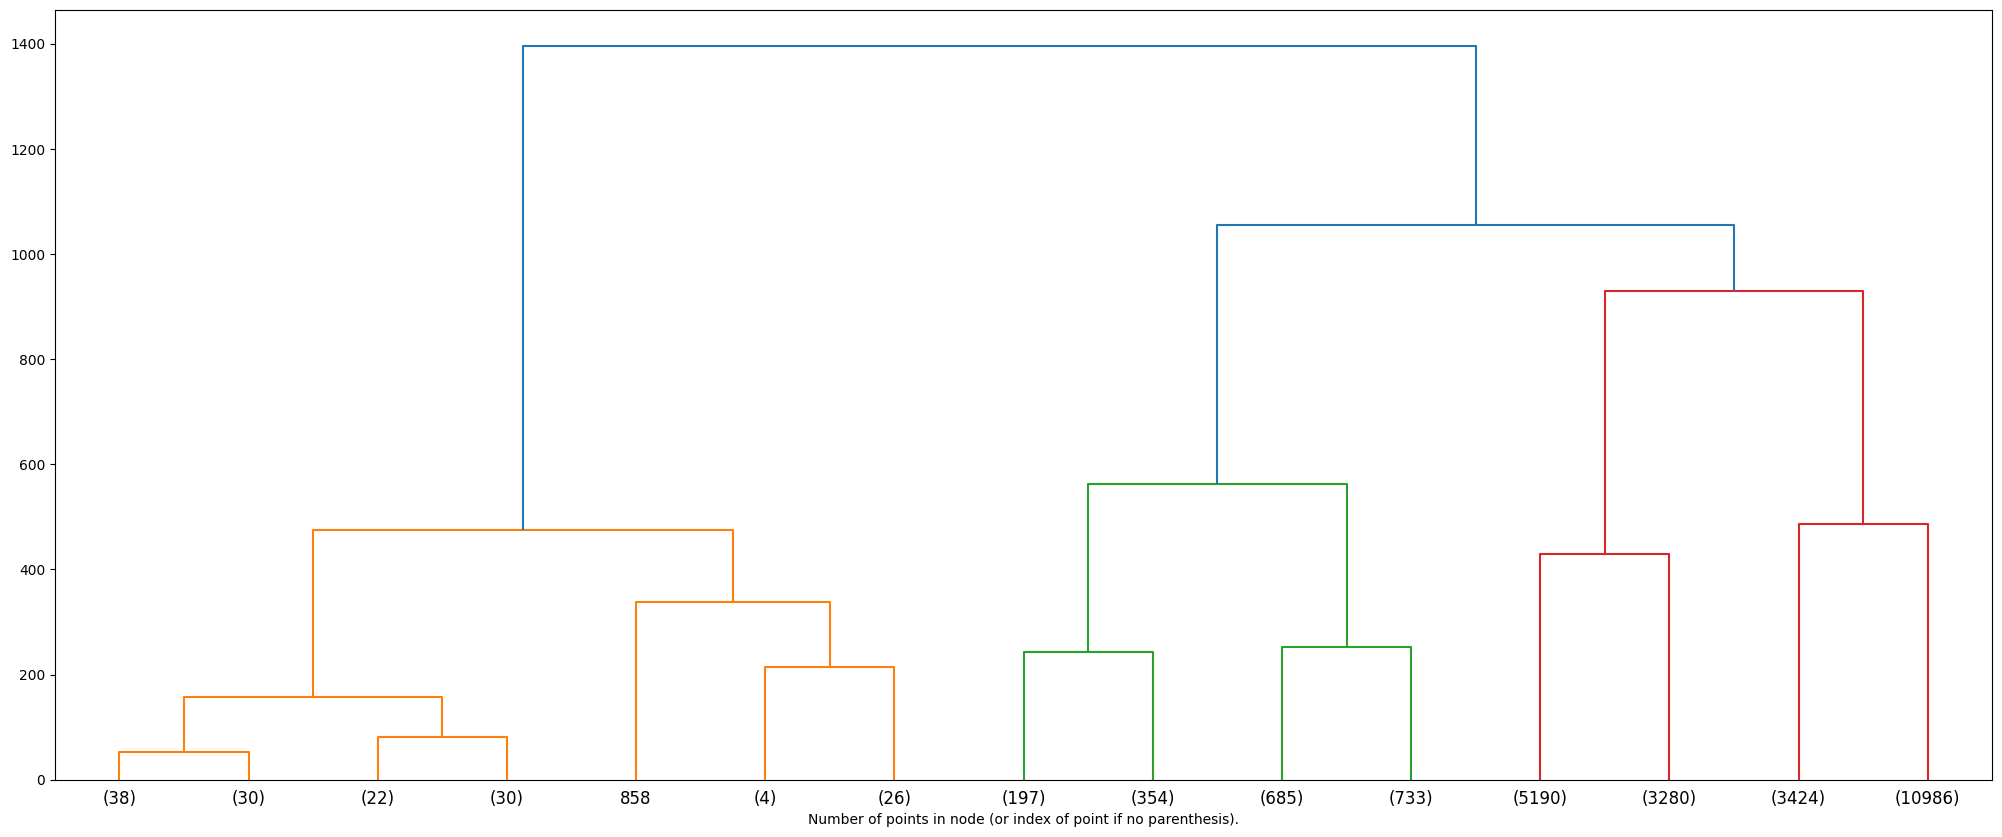

In [34]:
from scipy.cluster.hierarchy import dendrogram
counts = np.zeros(agmodel.children_.shape[0])
n_samples = len(agmodel.labels_)
for i, merge in enumerate(agmodel.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1 # leaf node
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count
linkage_matrix = np.column_stack([agmodel.children_, agmodel.distances_, counts]).astype(float)
fig = plt.figure(figsize=(25, 10))
dendrogram(linkage_matrix, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [35]:
df_cut = df_train.head(25000)
agmodel = AgglomerativeClustering(n_clusters=3)
agmodel.fit(df_cut[train_col])
df_cut['cluster_2'] = agmodel.labels_
df_cut

,WindGustDir,MinTemp,MaxTemp,Sunshine,Rainfall,Location,cluster,cluster_1,cluster_2
6049,11,0.891767,1.68262,12.3,0.0,Cobar,0,0,0
6050,8,0.96991,0.79767,13.0,0.0,Cobar,2,0,0
6051,9,0.516679,1.528105,13.3,0.0,Cobar,0,0,0
6052,5,1.126197,2.019743,10.6,0.0,Cobar,2,0,0
6053,14,1.516914,2.132118,12.2,0.0,Cobar,0,0,0
...,...,...,...,...,...,...,...,...,...
69184,3,1.141826,-0.031092,0.6,0.0,Melbourne,2,0,0
69185,9,0.329135,-0.255842,11.7,0.0,Melbourne,0,0,0
69186,10,0.329135,-0.017046,2.2,0.0,Melbourne,0,0,0
69187,8,0.438535,0.727436,10.0,0.0,Melbourne,2,0,0


In [36]:
clusters = pd.unique(df_cut['cluster_2'])
for cluster in clusters:
    df_cluster_2 = df_cut[(df_cut['cluster_2'] == cluster)]
    print(f"Cluster {cluster} ({df_cluster_2.shape})")
    print(df_cluster_2[train_col].describe())
    value_counts = df_cluster_2['Location'].value_counts()
    sorted_value_counts = value_counts.sort_values(ascending=False)
    print(sorted_value_counts.head(10))

Cluster 0 ((22880, 9))
        WindGustDir       MinTemp       MaxTemp  Sunshine  Rainfall
count         22880  22880.000000  22880.000000   22880.0   22880.0
unique           17    349.000000    374.000000     142.0      91.0
top               3     -0.030325     -0.592965       0.0       0.0
freq           1944    150.000000    171.000000     674.0   15765.0
Sydney              2943
MelbourneAirport    2861
SydneyAirport       2688
WaggaWagga          2414
NorfolkIsland       2299
Moree               1927
Sale                1722
Melbourne           1656
Canberra            1404
CoffsHarbour        1244
Name: Location, dtype: int64
Cluster 2 ((1969, 9))
        WindGustDir      MinTemp      MaxTemp  Sunshine  Rainfall
count          1969  1969.000000  1969.000000    1969.0    1969.0
unique           17   199.000000   243.000000     131.0     245.0
top               8     0.985539    -0.340122       0.0      11.4
freq            224    27.000000    25.000000     319.0      33.0
Sydney

In [49]:
def silhouette(X, cluster_labels):
    n_clusters = len(np.unique(cluster_labels))
    fig, ax1 = plt.subplots()
    fig.set_size_inches(18, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    silhouette_avg = silhouette_score(X,cluster_labels)
    print("For n_clusters =",n_clusters,"The average silhouette_score is :",silhouette_avg)
    sample_silhouette_values = silhouette_samples(X,cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_values,facecolor=color,edgecolor=color,alpha=0.7,)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.show()

In [38]:
ss = silhouette_score(df_train[train_col], df_train['cluster']) 
print(ss) 

0.3551691264932954


In [39]:
ss = silhouette_score(df_train[train_col], df_train['cluster_1']) 
print(ss) 

0.09126039414945832


In [40]:
ss = silhouette_score(df_cut[train_col], df_cut['cluster_2']) 
print(ss) 

0.540659404484864


For n_clusters = 3 The average silhouette_score is : 0.3551691264932954


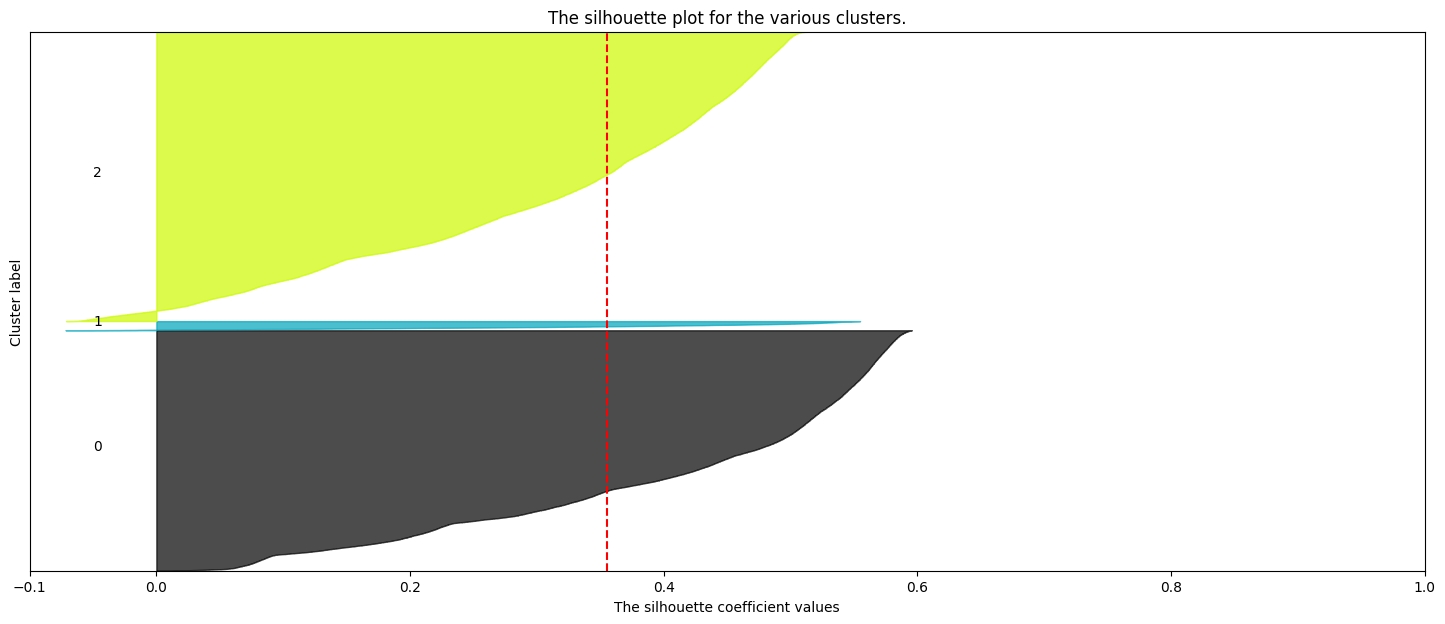

In [51]:
from sklearn.metrics import silhouette_samples
silhouette(df_train[train_col], df_train['cluster'])

For n_clusters = 7 The average silhouette_score is : 0.09126039414945832


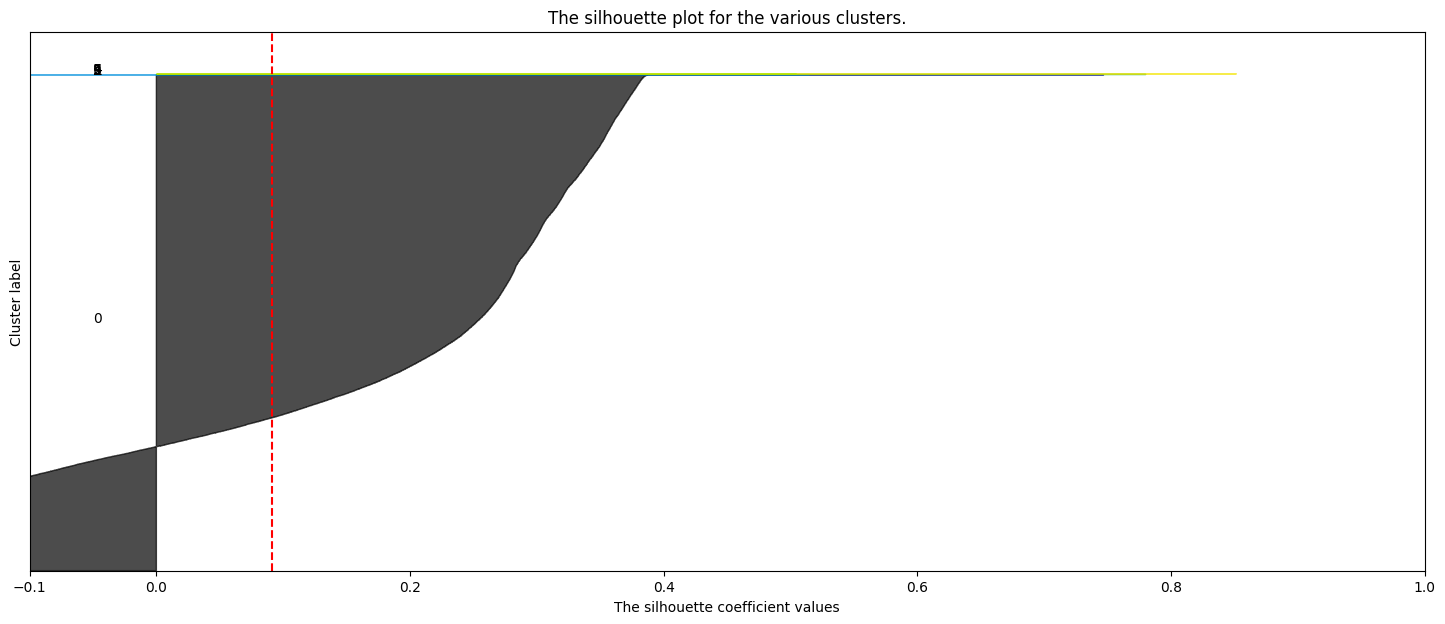

In [52]:
silhouette(df_train[train_col], df_train['cluster_1'])

For n_clusters = 3 The average silhouette_score is : 0.540659404484864


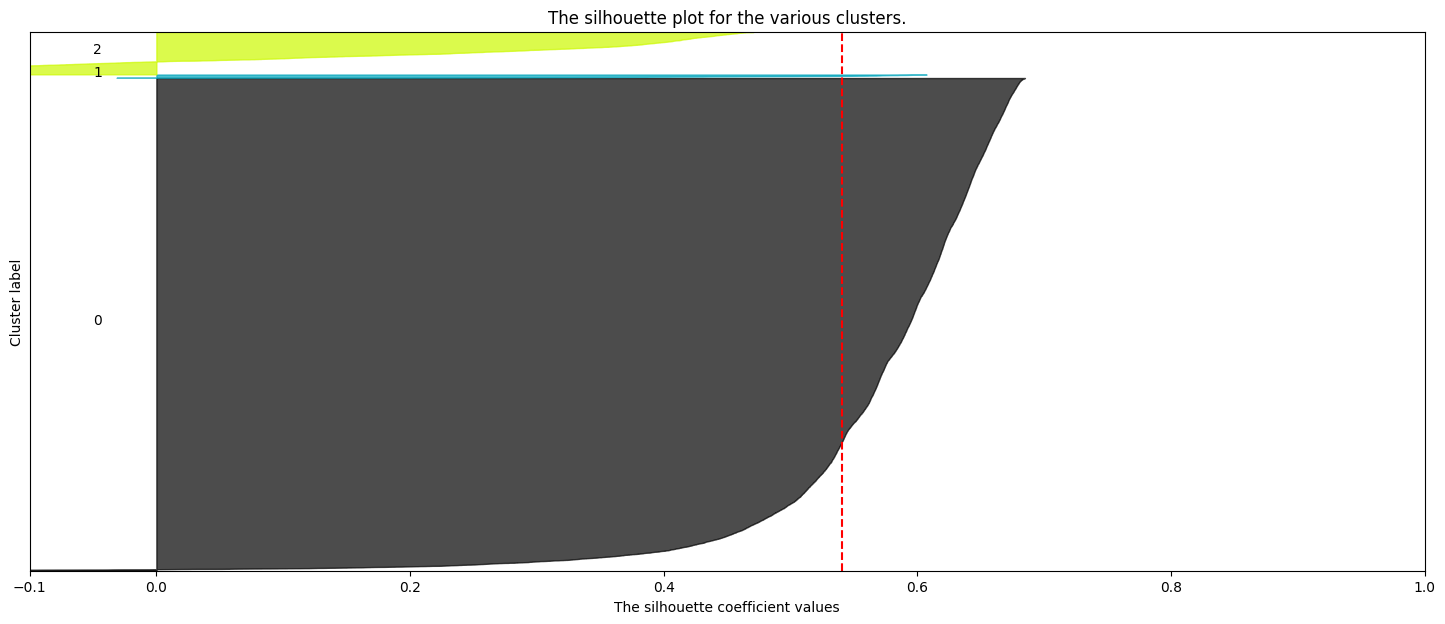

In [53]:
silhouette(df_cut[train_col], df_cut['cluster_2']) 

In [62]:
def visualize_3d_clustering(df, cluster0, x_column, y_column, z_column):
    ax = plt.axes(projection='3d')
    clusters = pd.unique(df[cluster0])
    cmap = plt.cm.get_cmap('hsv', len(clusters))
    for i, cluster in enumerate(clusters):
        df_cluster = df[(df[cluster0] == cluster)]
        xdata = df_cluster[x_column]
        ydata = df_cluster[y_column]
        zdata = df_cluster[z_column]
        ax.scatter3D(xdata, ydata, zdata, cmap=cmap(i))
    plt.show()

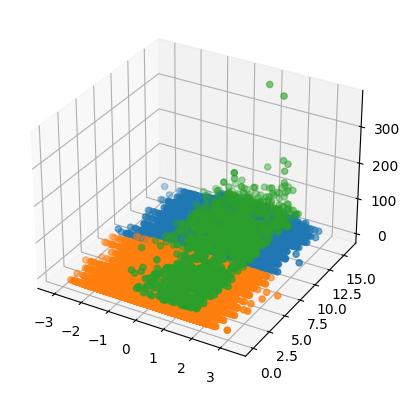

In [72]:
visualize_3d_clustering(df_train, 'cluster', 'MinTemp', 'WindGustDir', 'Rainfall')

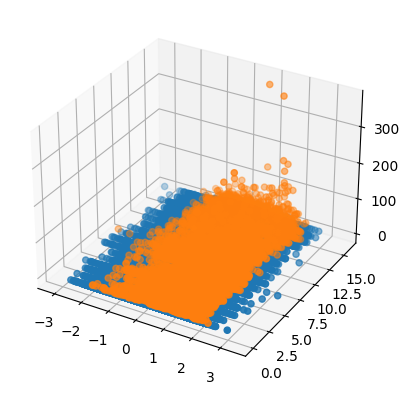

In [73]:
visualize_3d_clustering(df_train, 'cluster_1', 'MinTemp', 'WindGustDir', 'Rainfall')

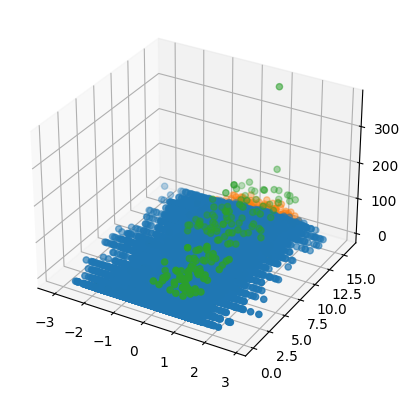

In [74]:
visualize_3d_clustering(df_cut, 'cluster_2', 'MinTemp', 'WindGustDir', 'Rainfall')

In [75]:
import seaborn as sns

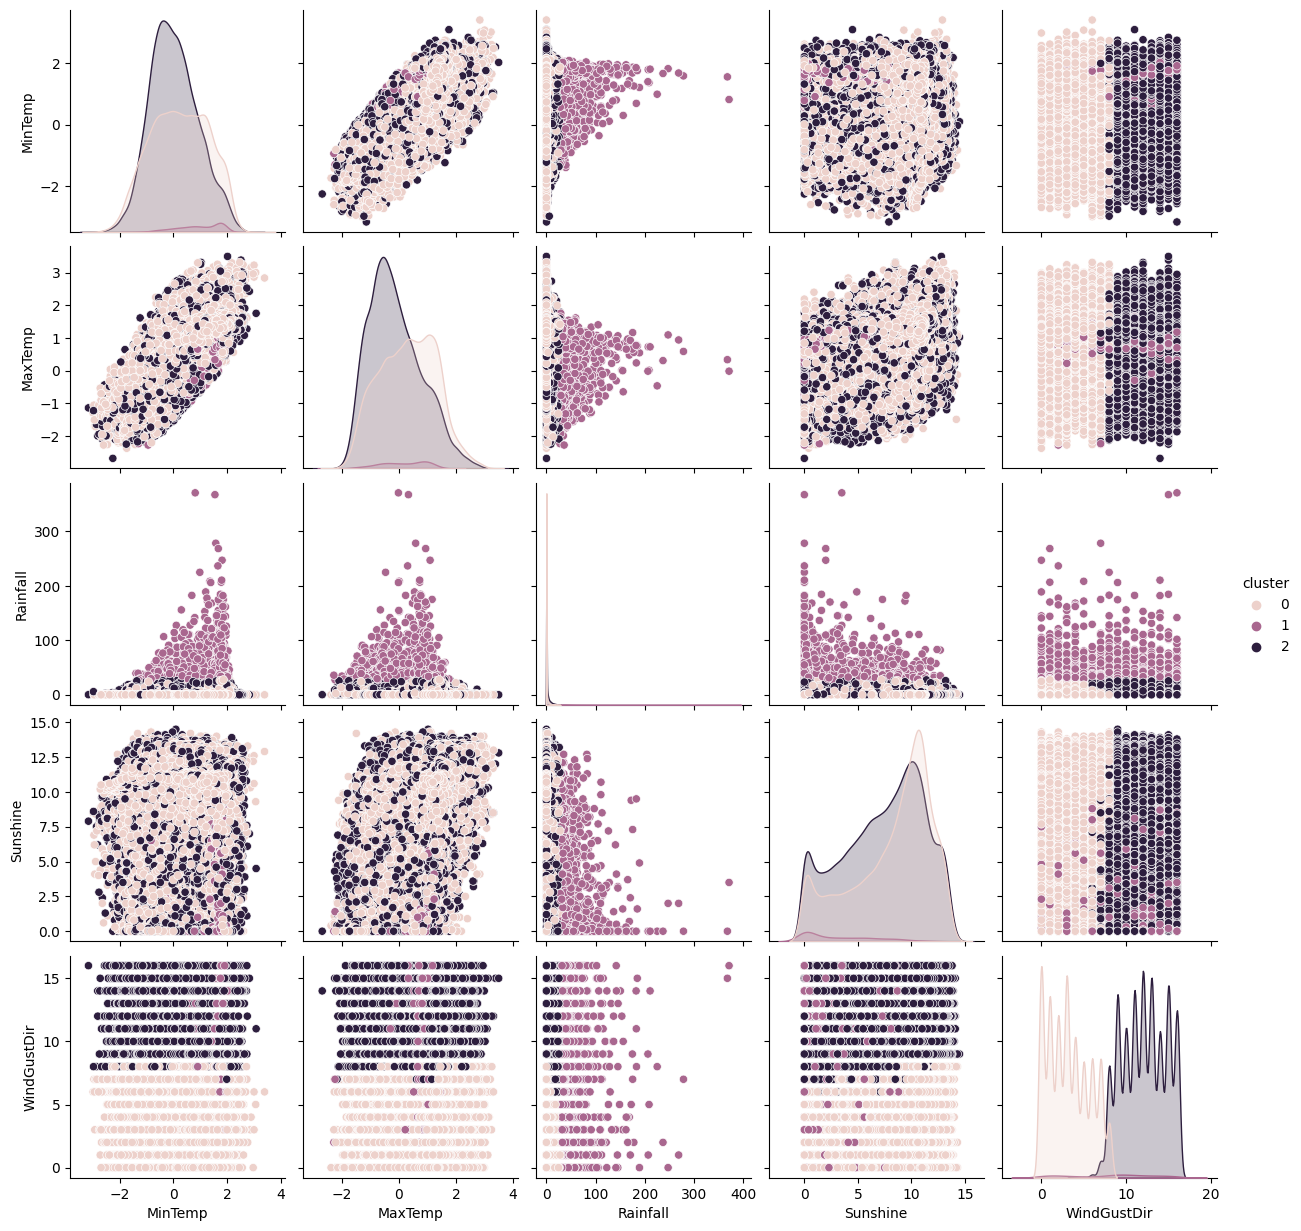

In [80]:
sns.pairplot(df_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustDir', 'cluster']], hue = 'cluster')

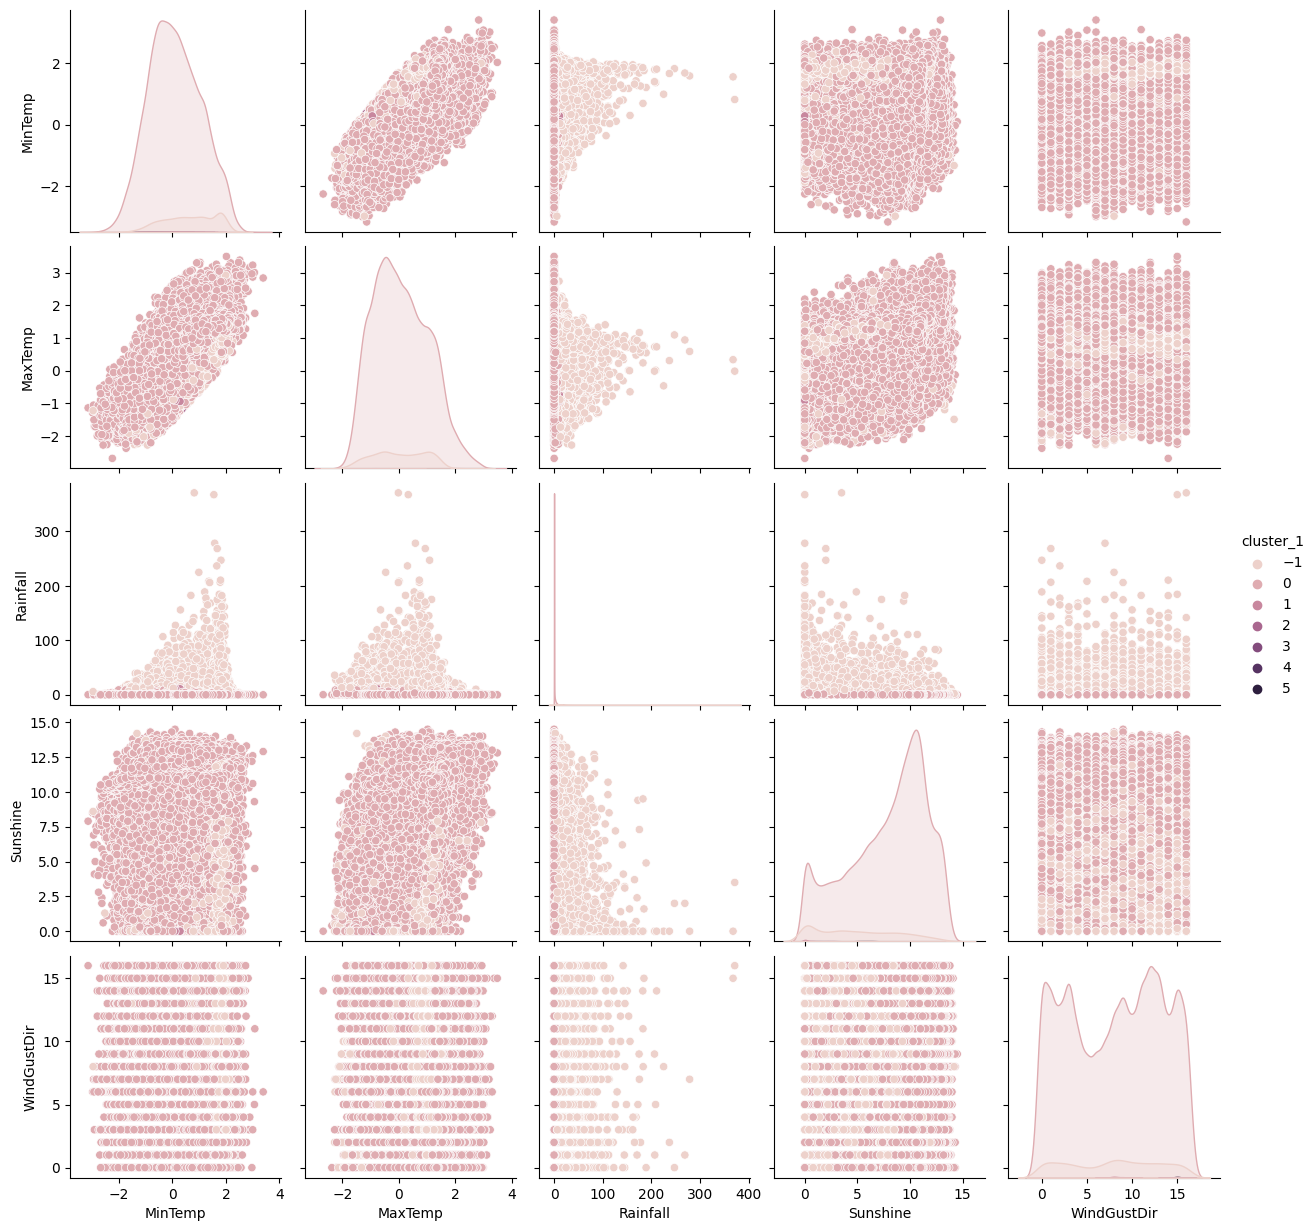

In [82]:
sns.pairplot(df_train[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustDir', 'cluster_1']], hue = 'cluster_1')

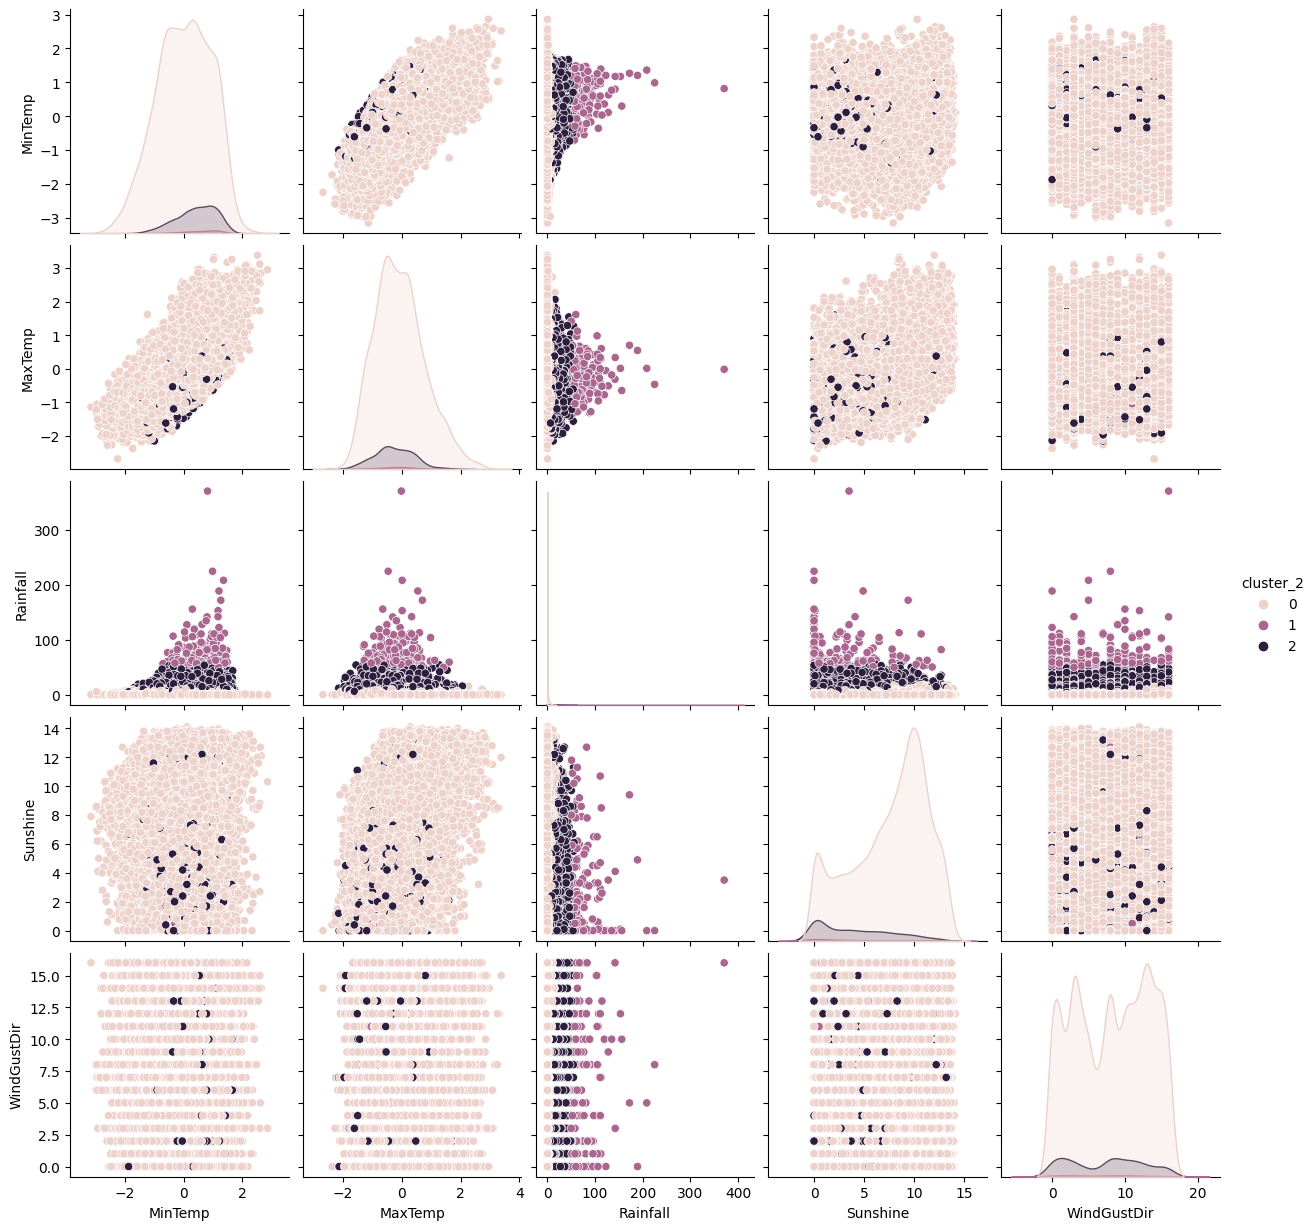

In [83]:
sns.pairplot(df_cut[['MinTemp', 'MaxTemp', 'Rainfall', 'Sunshine', 'WindGustDir', 'cluster_2']], hue = 'cluster_2')